In [1]:
%load_ext autoreload
%autoreload 2

import delaunay
from matplotlib import pyplot as plt
import numpy as np
import networkx as nx

In [2]:
# Generate sample data
np.random.seed(42)
points = np.random.rand(100, 2)
# G, triangles = create_simplicial_complex(points, radius=0.2)
G, delau = delaunay.delaunay_partition_graph(points, plot=False)

# Print some information about the graph
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')


Number of nodes: 100
Number of edges: 284


In [3]:
# Compute incidence matrices
from hodge_laplacian_decomp import compute_incidence_matrices_B
B1, B2 = compute_incidence_matrices_B(G)

In [4]:
print(f'B1 shape: {B1.shape}')
print(f'B2 shape: {B2.shape}')

B1 shape: (100, 284)
B2 shape: (284, 186)


In [5]:
# Compute eigenvectors
from hodge_laplacian_decomp import compute_hodge_laplacian_decomp
Q = compute_hodge_laplacian_decomp(B1, B2)

In [6]:
# Generate several sample trajectories
from edge_flow import get_edge_flow

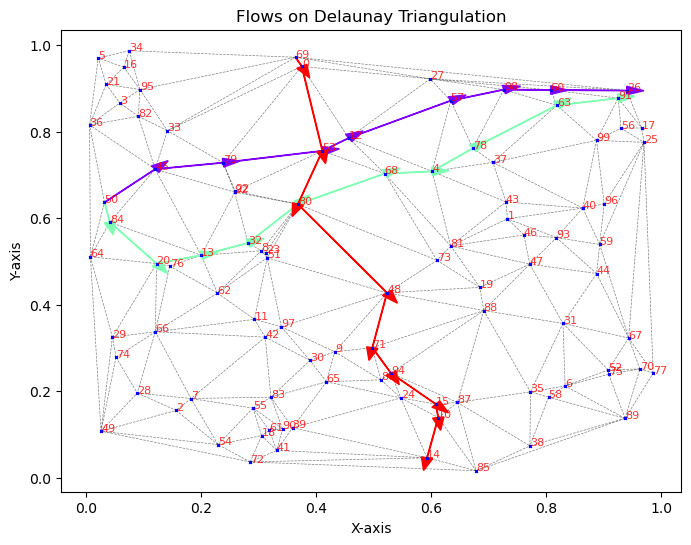

In [34]:
trajectory = [[(50, 45), (45, 79), (79, 53), (53, 12), (12, 57), (57, 98), (98, 60), (60, 26)],
              [(50, 84), (84, 20), (20, 13), (13, 32), (32, 80), (80, 68), (68, 4), (4, 78), (78, 63), (63, 91)],
              [(69, 0), (0, 53), (53, 80), (80, 48), (48, 71), (71, 94), (94, 15), (15, 10), (10,14)]]

delaunay.plot_delaunay_with_flow(delau, points, trajectory, G)

In [37]:
# Compute the Hodge-Laplacian embedding for each flow
embeddings = []
for traj in trajectory:
    print('Processing trajectory: ', traj)
    f = get_edge_flow(G, traj)
    e = Q.T @ f
    embeddings.append(e)
embeddings = np.array(embeddings)

Processing trajectory:  [(50, 45), (45, 79), (79, 53), (53, 12), (12, 57), (57, 98), (98, 60), (60, 26)]
Processing trajectory:  [(50, 84), (84, 20), (20, 13), (13, 32), (32, 80), (80, 68), (68, 4), (4, 78), (78, 63), (63, 91)]
Processing trajectory:  [(69, 0), (0, 53), (53, 80), (80, 48), (48, 71), (71, 94), (94, 15), (15, 10), (10, 14)]


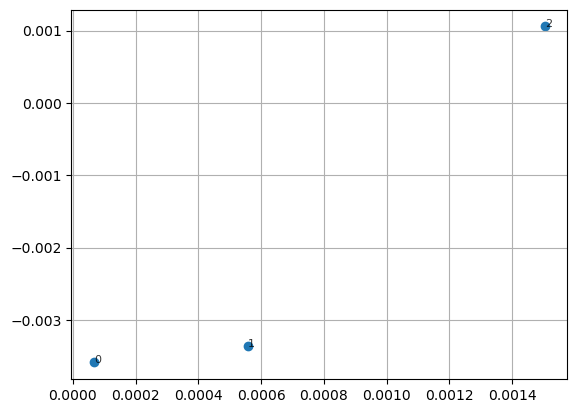

In [41]:
plt.scatter(embeddings[:,0], embeddings[:,1])
# Add labels to the points
for i, txt in enumerate(range(len(embeddings))):
    plt.annotate(txt, (embeddings[i,0], embeddings[i,1]), fontsize=8, alpha=0.8)
plt.grid(True)
plt.show()